Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [1]:
#Import librerias
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np


In [27]:
precios = pd.DataFrame()

Datos = ZipFile('precios.zip')

for Archivo in Datos.infolist():
    if (Archivo.filename.endswith('.xlsx') and not(Archivo.filename.startswith('__MACOSX'))):
        d = pd.read_excel(Datos.open(Archivo.filename), header=2)
        if d.columns[0].startswith('Unname'):
            nheader = d.iloc[0]
            d = d[1:]
            d = d.rename(columns = nheader)
        d = d.iloc[:,0:25]
        precios = precios.append(d)
df = pd.melt(precios,id_vars='Fecha', var_name = 'Hora', value_name = 'Precio')
df 

,Fecha,Hora,Precio
0,1996-01-01,0,25.000000
1,1996-01-02,0,10.000000
2,1996-01-03,0,12.000000
3,1996-01-04,0,12.800000
4,1996-01-05,0,18.000000
...,...,...,...
362539,2004-12-27,23,67.431239
362540,2004-12-28,23,65.931239
362541,2004-12-29,23,65.931239
362542,2004-12-30,23,67.431239


**2.--** Compute e imprima el número de registros con datos faltantes.

In [30]:
Datos_falt = df['Precio'].isnull().sum()
Datos_falt

181510

**3.--** Compute e imprima el número de registros duplicados.

In [32]:
df['Fecha'] = pd.to_datetime(df['Fecha'],infer_datetime_format=True)
df = df.sort_values('Fecha', ascending = True)
Duplicados = df.duplicated().sum()
Duplicados

3919

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [34]:
df = df[df.Precio.notnull()]
df = df[df.Fecha.notnull()]
df = df.drop_duplicates()
len(df)

179275

**5.--** Compute y grafique el precio primedio diario.

Text(0.5, 0, 'Días')

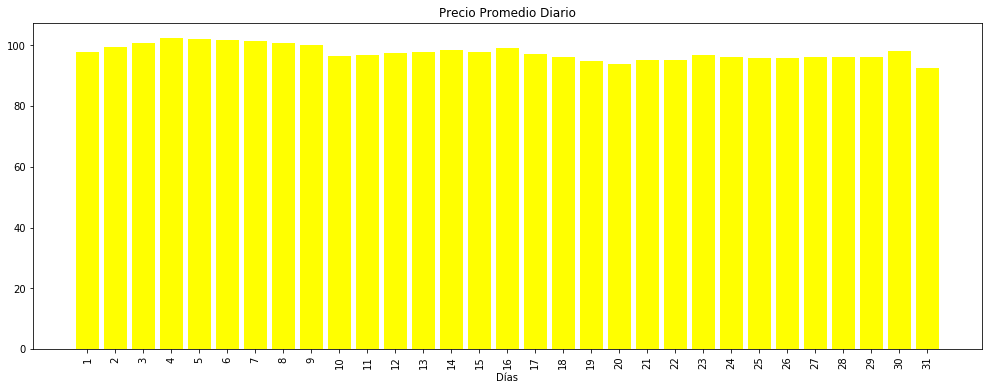

In [41]:
df['Dia'] = pd.DatetimeIndex(df['Fecha']).day
df.set_index(df["Fecha"],inplace=True)
dfdia = df.groupby('Dia').mean()['Precio']
plt.figure(figsize=(17,6))
plt.bar(range(len(dfdia)), dfdia, color='yellow')
plt.xticks(range(len(dfdia)), list(dfdia.index), rotation='vertical')
plt.title('Precio Promedio Diario')
plt.xlabel('Días')

**6.--** Compute y grafique el precio máximo por mes.

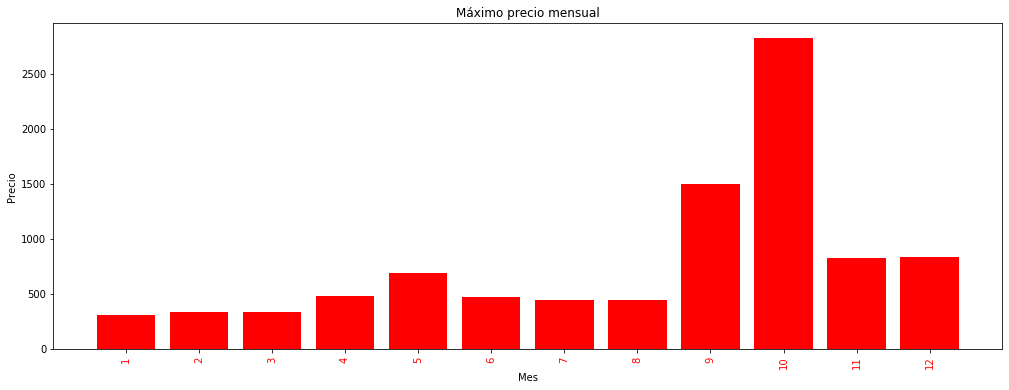

In [62]:
plt.figure(figsize=(17,6))
plt.bar(range(len(dfmesmax)), dfmesmax, color='red')
plt.xticks(range(len(dfmesmax)), list(dfmesmax.index), rotation='vertical',color='red')
plt.title('Máximo precio mensual')
plt.xlabel('Mes')
plt.ylabel('Precio');

**7.--** Compute y grafique el precio mínimo mensual.

Text(0, 0.5, 'Precio')

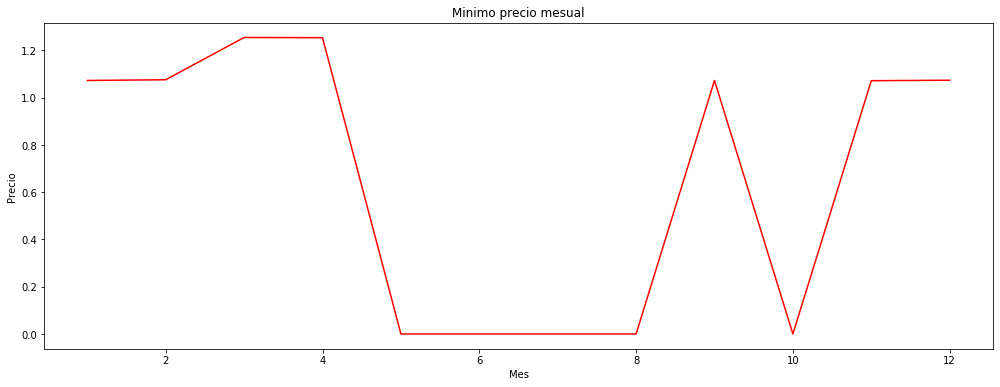

In [66]:
df['Mes'] = df['Fecha'].dt.month
df2 = df.groupby('Mes')['Precio'].min()
plt.figure(figsize=(17,6))
plt.plot(df2, color='red')
plt.title('Minimo precio mesual')
plt.xlabel('Mes');
plt.ylabel('Precio')

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

Text(0, 0.5, 'Mes')

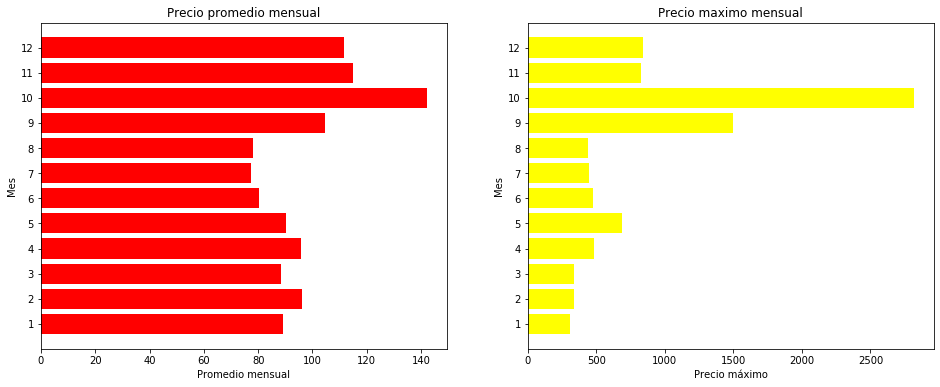

In [68]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.barh(range(len(dfmes)), dfmes, color='red')
plt.yticks(range(len(dfmes)), list(dfmes.index), rotation='horizontal')
plt.title('Precio promedio mensual')
plt.xlabel('Promedio mensual')
plt.ylabel('Mes')
plt.subplot(1, 2, 2)
plt.barh(range(len(dfmesmax)), dfmesmax, color='Yellow')
plt.yticks(range(len(dfmesmax)), list(dfmesmax.index), rotation='horizontal')
plt.title('Precio maximo mensual')
plt.xlabel('Precio máximo')
plt.ylabel('Mes')

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

Text(0, 0.5, 'Frecuencia')

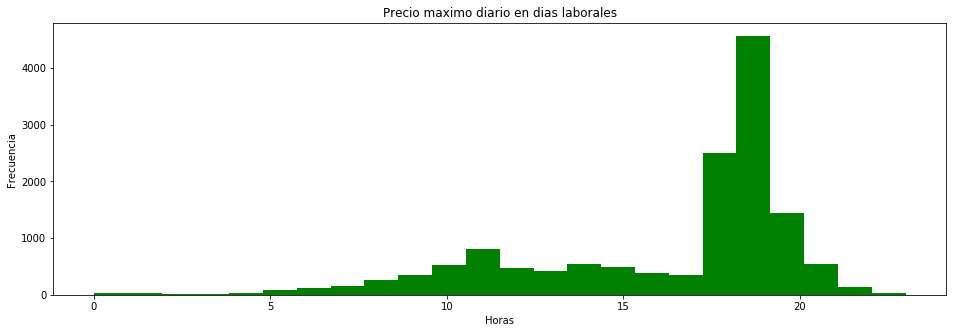

In [122]:
df['duplicados'] = df['Fecha'].map(str) +'-'+ df['Hora'].map(str) +'-'+ df['Precio'].map(str) 
f_duplicados = df[df.duplicated(['duplicados'])]
df2 = df.copy()
df2 = df2.drop(columns=['Fecha', 'duplicados'])
df2.reset_index(inplace=True)
df2['Nombre_Dia'] =  df2[['Fecha']].apply(lambda x: datetime.datetime.strftime(x['Fecha'], '%A'), axis=1)
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = df2[(df2['Nombre_Dia'] == 'Monday') | (df2['Nombre_Dia'] == 'Tuesday')| (df2['Nombre_Dia'] == 'Wednesday')| (df2['Nombre_Dia'] == 'Thursday')| (df2['Nombre_Dia'] == 'Friday')]
df2 = df_weekdays.groupby('Fecha').agg({'Precio': np.max}) 
df2.reset_index(inplace=True)
df3 = pd.merge(df_weekdays, df2, on=['Fecha','Precio'], how='inner')
hours = list(map(int,df3['Hora'].tolist()))
plt.figure(figsize=(16,5))
plt.hist(hours, color='green', bins=24)
plt.title('Precio maximo diario en dias laborales')
plt.xlabel('Horas')
plt.ylabel('Frecuencia')

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

Text(0, 0.5, 'Frecuencia')

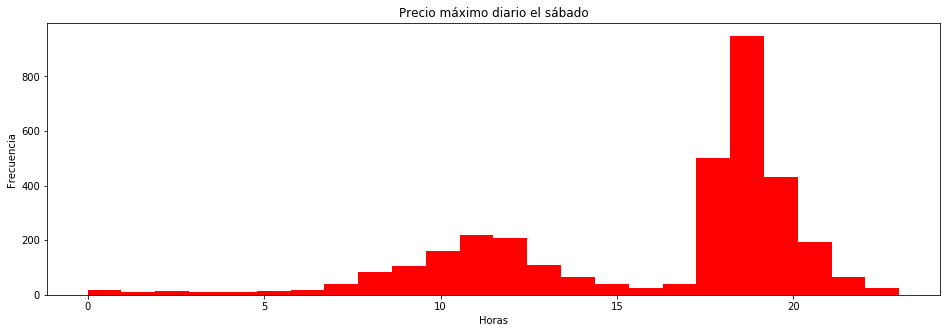

In [123]:
df['duplicados'] = df['Fecha'].map(str) +'-'+ df['Hora'].map(str) +'-'+ df['Precio'].map(str) 
f_duplicados = df[df.duplicated(['duplicados'])]
df2 = df.copy()
df2 = df2.drop(columns=['Fecha', 'duplicados'])
df2.reset_index(inplace=True)
df2['Nombre_Dia'] =  df2[['Fecha']].apply(lambda x: datetime.datetime.strftime(x['Fecha'], '%A'), axis=1)
df_weekdays = df2[(df2['Nombre_Dia'] == 'Saturday') ]
df2 = df_weekdays.groupby('Fecha').agg({'Precio': np.max}) 
df2.reset_index(inplace=True)
df3 = pd.merge(df_weekdays, df2, on=['Fecha','Precio'], how='inner')
hours = list(map(int,df3['Hora'].tolist()))
plt.figure(figsize=(16,5))
plt.hist(pd.to_numeric(df3['Hora']), color='red', bins=24)
plt.title('Precio máximo diario el sábado')
plt.xlabel('Horas')
plt.ylabel('Frecuencia')

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

Text(0, 0.5, 'Cantidad')

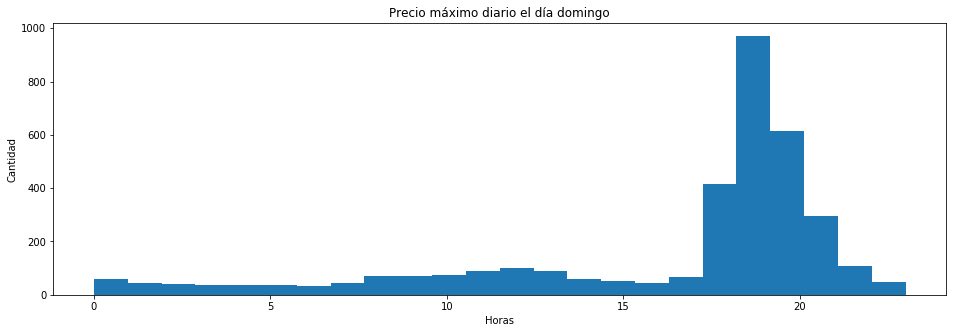

In [124]:
df['duplicados'] = df['Fecha'].map(str) +'-'+ df['Hora'].map(str) +'-'+ df['Precio'].map(str) 
f_duplicados = df[df.duplicated(['duplicados'])]
df2 = df.copy()
df2 = df2.drop(columns=['Fecha', 'duplicados'])
df2.reset_index(inplace=True)
df2['Nombre_Dia'] =  df2[['Fecha']].apply(lambda x: datetime.datetime.strftime(x['Fecha'], '%A'), axis=1)
df_weekdays = df2[(df2['Nombre_Dia'] == 'Sunday') ]
df2 = df_weekdays.groupby('Fecha').agg({'Precio': np.max}) 
df2.reset_index(inplace=True)
df3 = pd.merge(df_weekdays, df2, on=['Fecha','Precio'], how='inner')
hours = list(map(int,df3['Hora'].tolist()))
plt.figure(figsize=(16,5))
plt.hist(hours, bins=24)
plt.title('Precio máximo diario el día domingo')
plt.xlabel('Horas')
plt.ylabel('Cantidad')

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [125]:
df['duplicados'] = df['Fecha'].map(str) +'-'+ df['Hora'].map(str) +'-'+ df['Precio'].map(str) 
f_duplicados = df[df.duplicated(['duplicados'])]
df2 = df.copy()
df2 = df2.drop(columns=['Fecha', 'duplicados', 'Mes'])
df2.reset_index(inplace=True)
df2['Year'] =  df2[['Fecha']].apply(lambda x: datetime.datetime.strftime(x['Fecha'], '%Y'), axis=1)
df3 = df2.groupby('Year').agg({'Precio': np.min}) 
df3.reset_index(inplace=True)
df3.columns = ["Year","min"]
df4 = pd.merge(df3, df2, on = ['Year'], how ='inner')
df4 = df4[(df4['min'] == df4['Precio'])]
df4 = df4[['Fecha','min']].drop_duplicates(subset='min', keep="first")
df4.head()

,Fecha,min
153,1995-07-26,0.000000
17423,1997-07-15,10.882310
26057,1998-07-09,13.847330
32328,1999-03-28,18.359530
41039,2000-03-25,21.531167


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

Text(0.5, 0, 'Año')

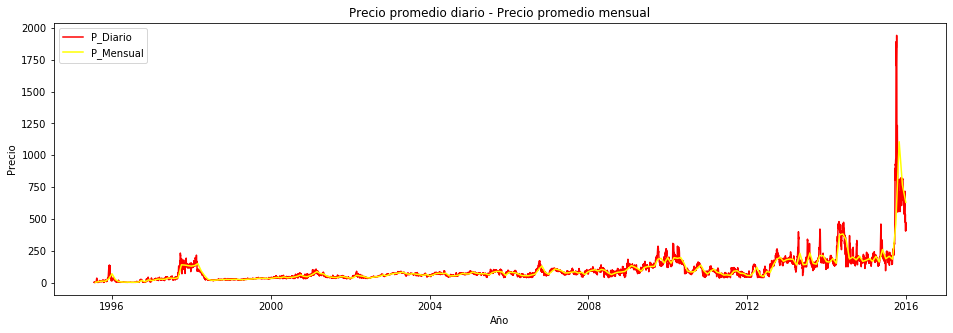

In [127]:
PromedioDiario = df[['Fecha','Precio']].groupby(by = pd.Grouper(key='Fecha', freq='D')).mean()
PromedioMensual = df[['Fecha','Precio']].groupby(by = pd.Grouper(key='Fecha', freq='M')).mean()
plt.figure(figsize=(16,5))
plt.plot(PromedioDiario,  color='red')
plt.plot(PromedioMensual,  color='yellow')
plt.legend(['P_Diario','P_Mensual'])
plt.title('Precio promedio diario - Precio promedio mensual') 
plt.ylabel('Precio')
plt.xlabel('Año')

---